# Welcome to Classical Machine Learning 


This is for the Kickstart demo

## Linear Regression with Gradient Descent

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Load the Boston Housing Prices dataset
california = fetch_california_housing()
X, y = california.data, california.target

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term to the features
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Initialize the parameters (weights) with zeros
theta = np.zeros((X_train_bias.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

In [8]:
# Perform gradient descent
for iteration in range(n_iterations):
    gradients = -2/X_train_bias.shape[0] * X_train_bias.T.dot(y_train - X_train_bias.dot(theta))
    theta = theta - learning_rate * gradients

KeyboardInterrupt: 

In [ ]:
# Make predictions on the test set
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred = X_test_bias.dot(theta)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

In [ ]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression with Gradient Descent - Boston Housing Prices')
plt.show()

## Linear Regression with Gradient Descent - Packaged version

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
# Generate synthetic data for illustration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [11]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions for new data
new_data = np.array([[2.5]])  # Assuming a house size of 2.5
predicted_price = model.predict(new_data.reshape(-1, 1))

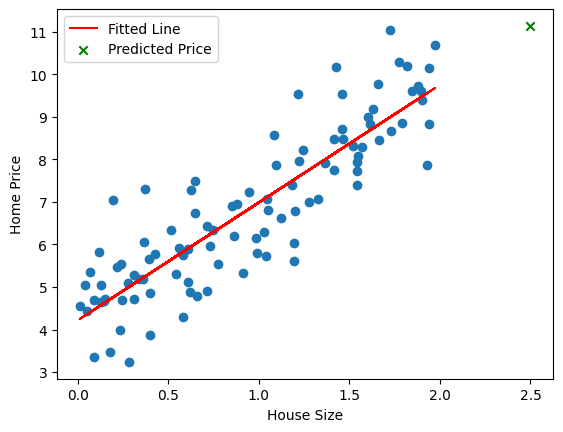

In [12]:
# Visualize the data and the fitted line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.scatter(new_data, predicted_price, color='green', marker='x', label='Predicted Price')
plt.xlabel('House Size')
plt.ylabel('Home Price')
plt.legend()
plt.show()

## Logistic Regression with Scikit Learn Package

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [14]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Support Vector Machine Classifier using Sklearn

In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
# Generate synthetic data for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)


In [24]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [26]:
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

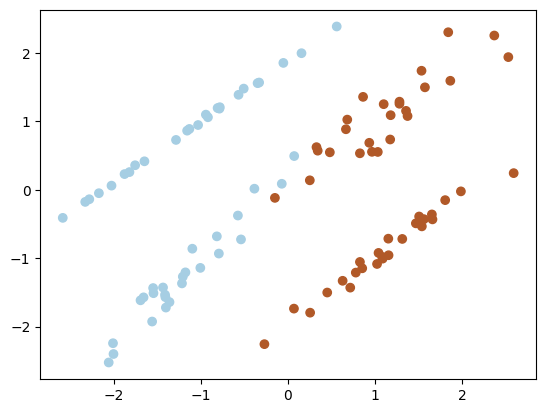

In [27]:
# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)


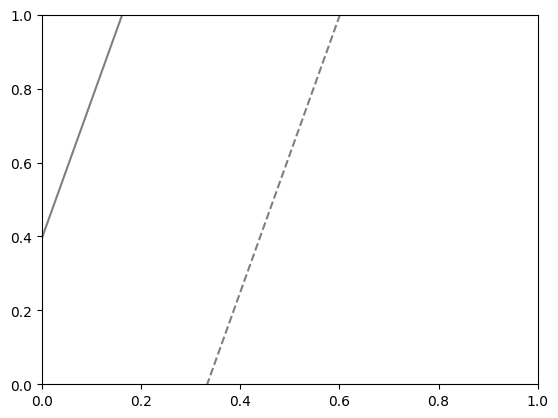

In [28]:
# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


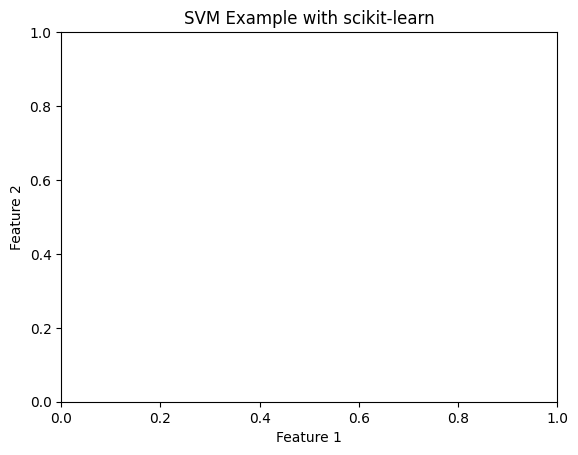

In [29]:
plt.title('SVM Example with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [30]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.95
Confusion Matrix:
[[10  1]
 [ 0  9]]


## Decision Tree Classifier 

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [32]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Create a Decision Tree classifier without pruning
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



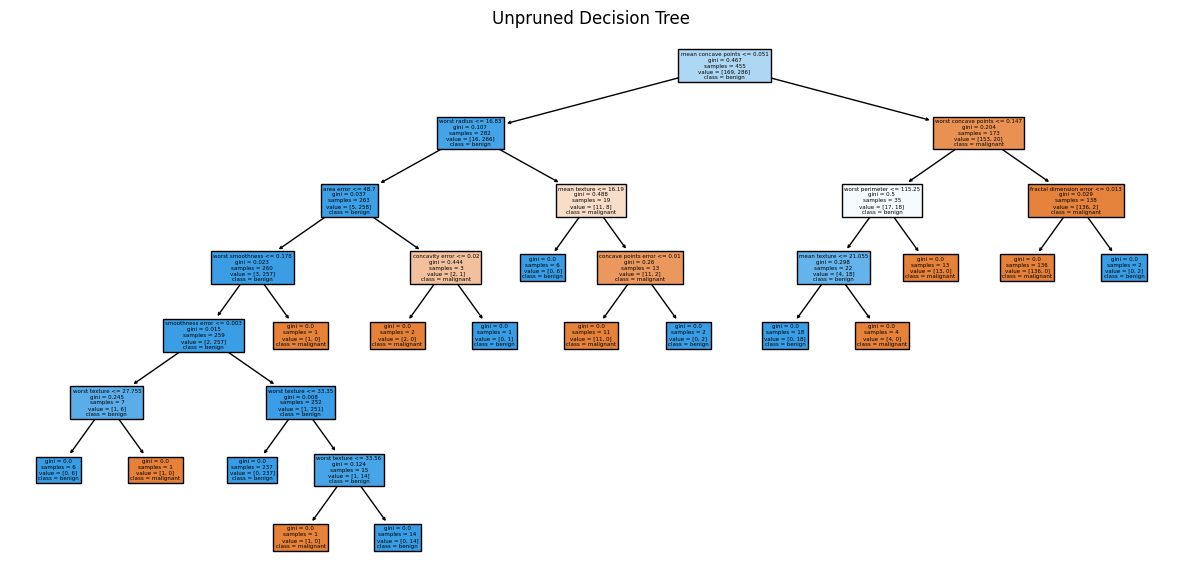

In [35]:
# Visualize the unpruned tree
plt.figure(figsize=(15, 7))
plot_tree(dt_classifier, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Unpruned Decision Tree")
plt.show()

In [36]:
# Apply cost-complexity pruning
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

# Train Decision Trees with different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

ValueError: num must be an integer with 1 <= num <= 10, not 11

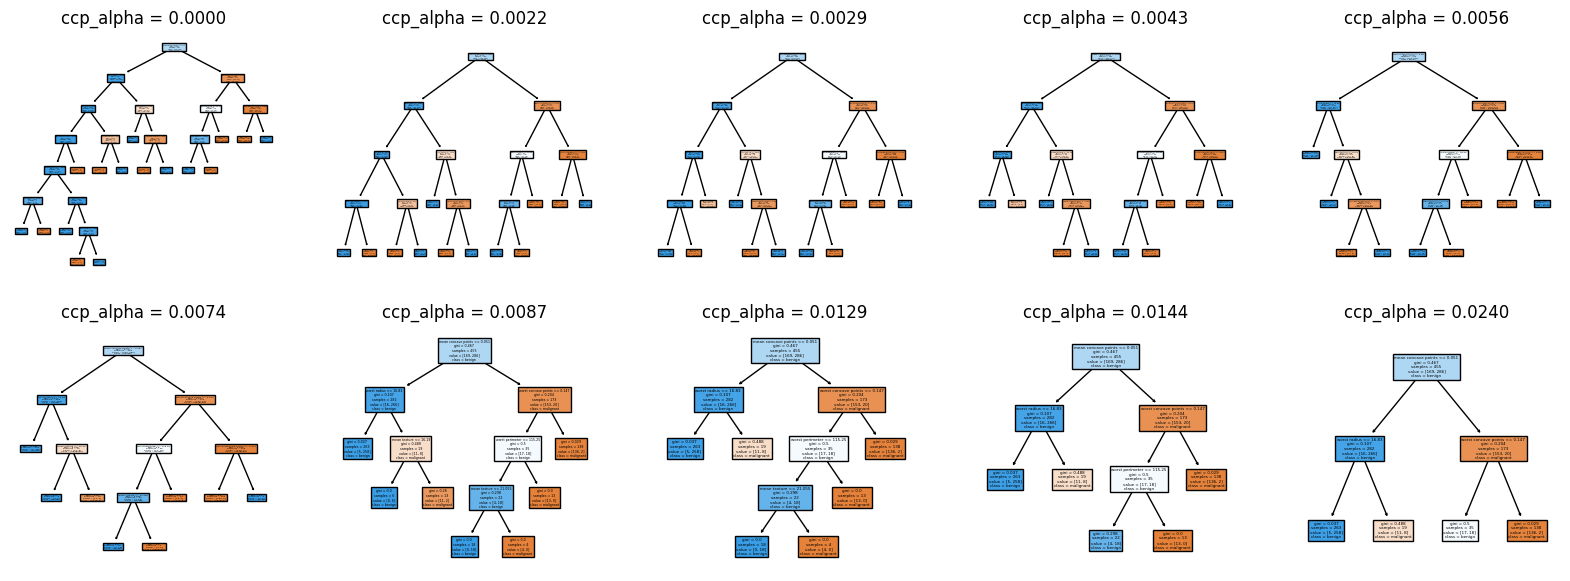

In [37]:
# Visualize the pruned trees
plt.figure(figsize=(20, 7))
for i, clf in enumerate(clfs):
    plt.subplot(2, 5, i + 1)
    plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
    plt.title(f"ccp_alpha = {ccp_alphas[i]:.4f}")
plt.show()

## Random Forest Classifier

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [43]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

